# Geodata template to KML

In this notebook, we will convert the geodata template into a kml file. The kml file can be used to visualize the geodata in [Google Earth](https://www.google.com/intl/en_ALL/earth/about/). We will proceed as follows:

1. Import the necessary libraries.
2. Load the geodata template. We created a test file which contains two test points. It can be further extended in the future to include more information.
3. Visualize the test data.
3. Convert the geodata template into a kml file.

We will work with the following libraries:

* [pandas](https://pandas.pydata.org/): Python library to work with data.
* [geopandas](https://geopandas.org/): Python library to work with geodata.
* [matplotlib](https://matplotlib.org/): Python library to work with plots.
* [fiona](https://fiona.readthedocs.io/en/latest/manual.html): Python library to import and export to different geodata file formats.
* [shapely](https://shapely.readthedocs.io/en/stable/manual.html): Python library to work with spatial objects.


## Data import

In a first step, we import the necessary libraries.

In [1]:
# for xlsx import
import pandas as pd

# for geocoding
import geopandas as gpd
from shapely.geometry import Point

# for plotting
import matplotlib.pyplot as plt

# for export to KML at the end
import fiona

fiona.supported_drivers["KML"] = "rw"

After we imported the necessary libraries, we load the geodata from the xlsx file.

In [2]:
file_name = "data/test-data.xlsx"
df = pd.read_excel(file_name, header=0, skiprows=1)

# Now we have to clean out all the rows that are empty. Given that 'unique_id' is
# prefilled we have to put it into a temporary variable, drop it and add it at the end
# after to we dropped all the empty rows.
temp = df["unique_id"]
df = df.drop("unique_id", axis=1)

# Entferne Zeilen mit NaNs in allen Spalten
df = df.dropna(how="all")

# Füge die Spalte 'unique_id' wieder hinzu
df["unique_id"] = temp

df.head()

/Users/fredjendrzejewski/miniconda3/envs/geodata-model/lib/python3.11/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,KfW Project -No.\n(INPRO),Project-specific location identifier,Location name,Author of the Data \n(=the legal owner),Publishing restrictions due to security reasons,Date of data collection or latest update,Location Activity Status,Planned or actual start date of activity at the location,Activity-Description (general),Additional Activity-Description,...,DAC 5 Purpose Classification,Geographic Exactness,Latitude,Longitude,Related Community / Village / Neighborhood,Additional Geo-data submitted as KML (Lines/Polygons),GADM GID,GID Level,GADM version,unique_id
0,NaN,NaN,School 1,Freddy Fred,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.12057,8.65660,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,School 2,Freddy Fred,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,28.56464,77.15487,NaN,NaN,NaN,NaN,NaN,2


As we can see all the required data were imported into the object `df`.Now it is time to transform this into a geodata object. 

In [3]:
df["geometry"] = df.apply(lambda row: Point(row["Longitude"], row["Latitude"]), axis=1)

And now create a geopandas dataframe from the geodata object.

In [4]:
gdf = gpd.GeoDataFrame(df, geometry="geometry")

## Visualization

To make sure that the import worked out nicely, we can plut the existing points on a map.

/var/folders/_v/vw5sh5fd4lv4x0cnk8cxz__w0000gn/T/ipykernel_17834/3205200294.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

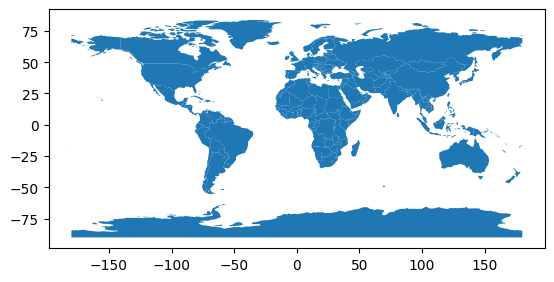

In [5]:
# Lade eine Weltkarte
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Erstelle eine neue Figur und Achse
fig, ax = plt.subplots()

# Zeichne die Weltkarte
world.plot(ax=ax)

# Zeichne die Punkte aus dem GeoDataFrame
gdf.plot(ax=ax, color="C0")

## Data export

And now that we have validated the appropiate import, we should also export it into a kml file.

In [6]:
gdf.to_file("data/test-data.kml", driver="KML")

The resulting file can be opened in Google Earth.

## Conclusion

In this notebook, we have seen how to convert the geodata template into a kml file. The kml file can be used to visualize the geodata in [Google Earth](https://www.google.com/intl/en_ALL/earth/about/).